# Data Analytics Course Starter Project

I'm going to get some familiarity with doing open-source data science projects. The key is to be able to analyze and synthesize results from real-time data quickly.

The code source for this project is the Educative course at https://www.educative.io/courses/data-analytics-in-python.

In [ ]:
# Functions
newnum = 236.119
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

bls.get_series('CIU2020000000000A').to_csv('bls_data.csv')
wages_data = pd.read_csv('bls_data.csv')
wages_data.columns = 'Date','Wages'
newwages_data = wages_data.applymap(process_wages)

cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date','CPI'
### replace dates
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
3', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
6', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-0\
9', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-1\
2', 'Q4')
newcpi_data = cpi_data[(cpi_data.Date.str.contains("-") == False)]

sp = pd.read_csv('new_s_p_500.csv')
sp['Date'] = sp['Date'].astype('datetime64[ns]')
sp['Date'] = sp['Date'].dt.strftime('%Y-%m-%d')
sp['Date'] = sp['Date'].str.replace('-03-30', 'Q1')
sp['Date'] = sp['Date'].str.replace('-06-30', 'Q2')
sp['Date'] = sp['Date'].str.replace('-09-30', 'Q3')
sp['Date'] = sp['Date'].str.replace('-12-31', 'Q4')
sp = sp[(sp.Date.str.contains('Q'))]
sp1 = sp[['Date', 'Close']]
sp1

No Data Available for Series CIU2020000000000A Year: 2024
/root/venv/lib/python3.9/site-packages/bls/api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(
/root/venv/lib/python3.9/site-packages/bls/api.py:147: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(float)
/tmp/ipykernel_187/2009224491.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  newwages_data = wages_data.applymap(process_wages)
/root/venv/lib/python3.9/site-packages/bls/api.py:147: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(float)
/tmp/ipykernel_187/2009224491.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is cons

,Date,Close
187,2002Q3,815.28
251,2002Q4,879.82
375,2003Q2,974.50
439,2003Q3,995.97
503,2003Q4,1111.92
564,2004Q1,1127.00
627,2004Q2,1140.84
691,2004Q3,1114.58
755,2004Q4,1211.92
815,2005Q1,1181.41


In [ ]:
merged_data = pd.merge(newcpi_data, newwages_data, on='Date')
merged_data

,Date,CPI,Wages
0,2015Q1,236.119,237.771833
1,2015Q2,238.638,239.079578
2,2015Q3,237.945,240.334746
3,2015Q4,236.525,241.596503
4,2016Q1,238.132,242.804486
5,2016Q2,241.018,244.382715
6,2016Q3,241.428,245.849011
7,2016Q4,241.432,247.262643
8,2017Q1,243.801,248.869850
9,2017Q2,244.955,250.363069


In [ ]:
DeepnoteChart(merged_data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Wages","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Wages"}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Wages","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Wages"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"CPI","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"CPI"}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"CPI","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"CPI"}}}]}],"title":"Wages and CPI Index over Time","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

Text(0.5, 0, 'Dates')

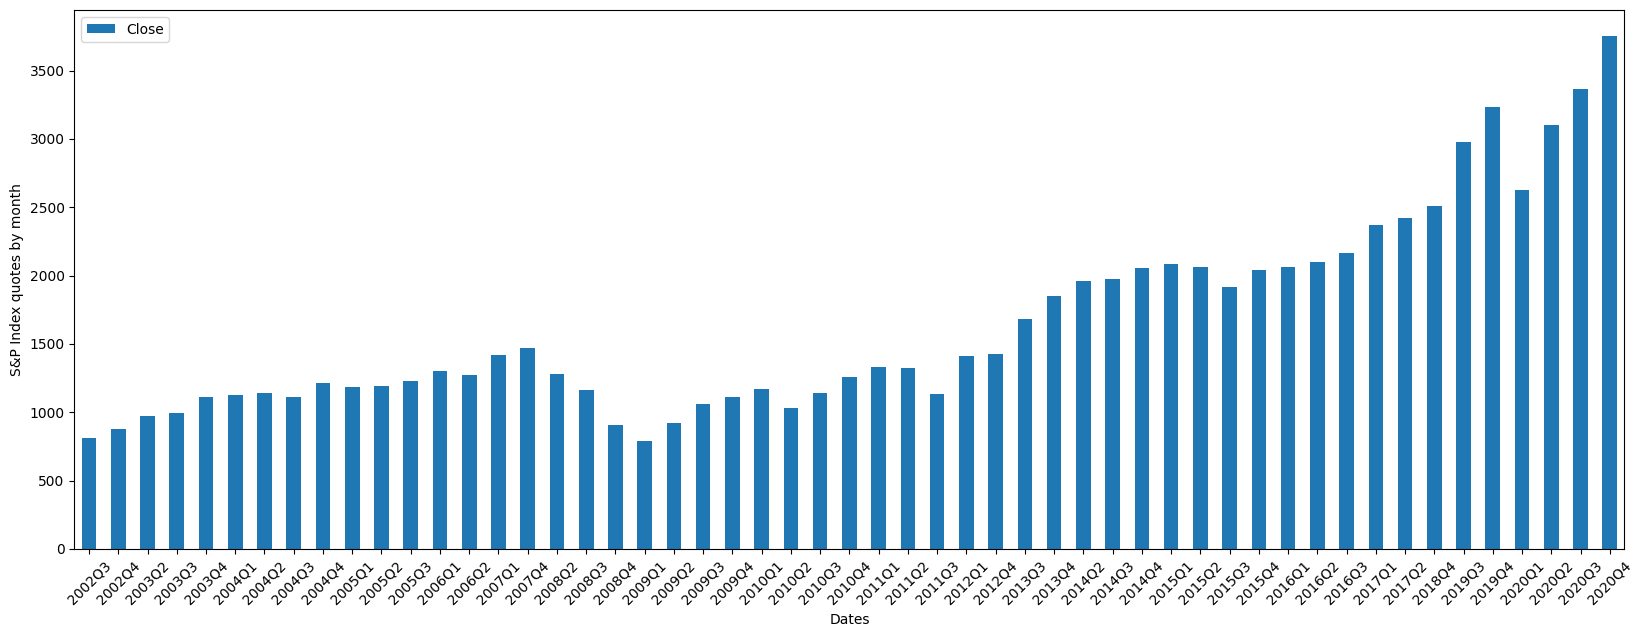

In [ ]:
# merge the three data sets
from functools import reduce 
dfs = [newcpi_data, newwages_data, sp1]
df_triple = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), dfs)
ax = sp1.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(sp1.Date, rotation=45)
ax.set_ylabel('S&P Index quotes by month')
ax.set_xlabel('Dates')


/tmp/ipykernel_187/2237029506.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_data.Date, rotation=45)


Text(0.5, 0, 'Dates')

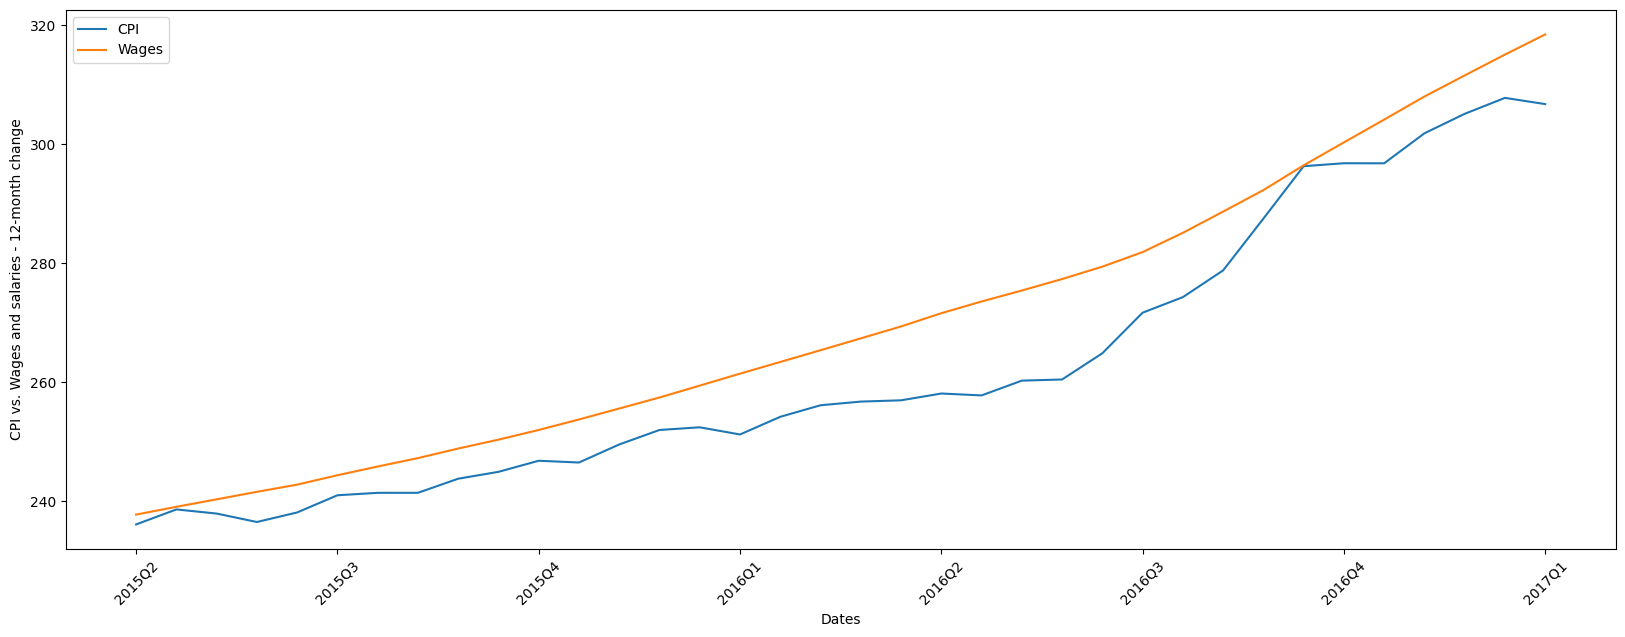

In [ ]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-mont\
h change')
ax.set_xlabel('Dates')

In [ ]:
first = 815.28
last = 3756.07
periods = 20
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print ('The S&P had a CAGR of {:.2%} '.format(CAGR(\
first, last, periods)))

first = 178.8
last = 260.28
periods = 20
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print ('The Consumer Price Index had a CAGR of {:.2\
%}'.format(CAGR(first, last, periods)))

first = 178.64
last = 281.31
periods = 20
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
print ('Wages had a CAGR of {:.2%} '.format(CAGR(first, last, periods)))

The S&P had a CAGR of 7.94% 
The Consumer Price Index had a CAGR of 1.90%
Wages had a CAGR of 2.30% 


In [ ]:
weights_data = pd.read_html('http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html')

In [ ]:
weights_data = weights_data[0]
weights_data = weights_data[weights_data.columns[1:]].iloc[1:,:]

KeyError: 0

In [ ]:
import matplotlib.pyplot as plt

weights_data.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74265987-4953-4886-86e9-52f940ff6770' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>